<a href="https://colab.research.google.com/github/AndrewFatula/Simple-CNNs/blob/master/FEC_TPU_RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from collections import deque


# tensorflow imports
import tensorflow as tf

# tf.keras imports
from tensorflow.keras import Model
from keras import regularizers

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

Using TensorFlow backend.


2.0.0


In [0]:
!pip uninstall auth
!pip uninstall grpcio
!pip uninstall tensorflow
!pip install auth==1.4.2
!pip install grpcio==1.24.3
!pip install tensorflow==2.0.0
print(tf.__version__)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1ZhyHQLphQOR1txqVfRFUgin8t0DB2cQj'}) # replace the id with id of file you want to access
downloaded.GetContentFile('face_images.npz') 
downloaded = drive.CreateFile({'id':'1on6VZZeFPpkGjNpz7rv4fwRzX2ZCyPUW'}) # replace the id with id of file you want to access
downloaded.GetContentFile('facial_keypoints.csv') 

dfile = "face_images.npz"
images = np.load(dfile, allow_pickle = True)['face_images']
facial_keypoints_df = pd.read_csv('facial_keypoints.csv')


if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)


cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
    tpu=tpu_address)
tf.config.experimental_connect_to_cluster(cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
tpu_strategy = tf.distribute.experimental.TPUStrategy(cluster_resolver)

BATCH_SIZE_PER_REPLICA = 16
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * tpu_strategy.num_replicas_in_sync

print ('Number of devices: {}'.format(tpu_strategy.num_replicas_in_sync))


TPU address is grpc://10.83.214.250:8470
INFO:tensorflow:Initializing the TPU system: 10.83.214.250:8470


INFO:tensorflow:Initializing the TPU system: 10.83.214.250:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of devices: 8


In [0]:
LEARNING_RATE = 0.005
num_classes = 30
n_filters = 64
n_fc1 = 2048
n_fc2 = 1024
pool = (4,4)
kernel_size1 = (3,3)
kernel_size2 = (2,2)
input_shape = ( 96, 96, 1)

n_epochs = 600

#input, n_filters, strides




class bottleneck_block(tf.keras.layers.Layer):
  def __init__(self, input_shape, n_filters):
    super(bottleneck_block, self).__init__()
    self.short = tf.keras.layers.Conv2D(n_filters, kernel_size = (1,1), 
                                        input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    input_shape2 = (input_shape[0], input_shape[1], int(n_filters/4))
    input_shape3 = (input_shape[0], input_shape[1], int(n_filters/2))

    self.conv1 = tf.keras.layers.Conv2D(int(n_filters/4), kernel_size = (1,1),
                                        input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.conv2 = tf.keras.layers.Conv2D(int(n_filters/2), kernel_size = (3,3), 
                                        padding = "same",input_shape=input_shape2, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Conv2D(n_filters, kernel_size = (1,1), 
                                      padding = "same", input_shape=input_shape3, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.layers = [self.short, self.conv1, self.conv2, self.out]

  def call(self, input):
     shortcut = self.short(input)
     input2 = self.conv1(input)
     input3 = self.conv2(input2)
     output = self.out(input3)
     return tf.keras.layers.Add()([shortcut, output]) 

  def get_layers(self):
    return self.layers  


class bottleneck_block_without_shortcut(tf.keras.layers.Layer):
  def __init__(self, input_shape):
    super(bottleneck_block_without_shortcut, self).__init__()
    input_shape2 = (input_shape[0], input_shape[1], int(input_shape[2]/4))
    input_shape3 = (input_shape[0], input_shape[1], int(input_shape[2]/2))

    self.conv1 = tf.keras.layers.Conv2D(int(input_shape[2]/4), kernel_size = (1,1),
                                        input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.conv2 = tf.keras.layers.Conv2D(int(input_shape[2]/2), kernel_size = (3,3), 
                                        padding = "same",input_shape=input_shape2, 
                                        activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Conv2D(input_shape[2], kernel_size = (1,1), padding = "same", 
                                      input_shape=input_shape3, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.layers = [ self.conv1, self.conv2, self.out]

  def call(self, input):
     input2 = self.conv1(input)
     input3 = self.conv2(input2)
     output = self.out(input3)
     return tf.keras.layers.Add()([input, output]) 

  def get_layers(self):
    return self.layers 





class residual_block(tf.keras.layers.Layer):
  def __init__(self, input_shape, n_filters, kernel_size):
    super(residual_block, self).__init__()

    self.short = tf.keras.layers.Conv2D(n_filters, kernel_size = (kernel_size[0]*3 - 2, kernel_size[1]*3 - 2),  
                                        input_shape = input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.conv1 = tf.keras.layers.Conv2D(int(n_filters/4), kernel_size = kernel_size, input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))

    input_shape2 = (input_shape[1]-(kernel_size[0]-1), input_shape[2] - (kernel_size[1]-1), int(n_filters/4))
    self.conv2 = tf.keras.layers.Conv2D(int(n_filters/2), kernel_size = kernel_size, input_shape = input_shape2, activation="relu", kernel_regularizer=regularizers.l2(0.002))

    input_shape3 = (input_shape2[1]-(kernel_size[0]-1), input_shape2[2] - (kernel_size[1]-1), int(n_filters/2))
    self.conv3 = tf.keras.layers.Conv2D(n_filters, kernel_size = kernel_size, input_shape = input_shape3, activation="relu", kernel_regularizer=regularizers.l2(0.002))

    self.layers = [self.short, self.conv1, self.conv2, self.conv3]

  def call(self, input):
     shortcut = self.short(input)
     input2 = self.conv1(input)
     input3 = self.conv2(input2)
     output = self.conv3(input3)
     return tf.keras.layers.Add()([shortcut, output]) 

  def get_layers(self):
    return self.layers  



class BCNN(tf.keras.Model):

  def __init__(self, input, num_classes, n_filters, n_fc1, n_fc2):
    super(BCNN, self).__init__()
    self.start_conv = tf.keras.layers.Conv2D(int(n_filters/8), kernel_size = (5, 5), padding = "same",  
                                        input_shape = input, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    
    input_shape = (input[0], input[1], int(n_filters/8))
    self.bottleneck1 = bottleneck_block(input_shape, n_filters)
    self.dropout = tf.keras.layers.Dropout(0.3)
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))


    input_shape1 = (int(input_shape[0]/2), int(input_shape[1]/2), n_filters)
    self.bottleneck2 = bottleneck_block_without_shortcut(input_shape1)
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))

    input_shape2 = (int(input_shape[0]/4), int(input_shape[1]/4), n_filters)
    self.bottleneck3 = bottleneck_block_without_shortcut(input_shape2)
    self.pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))

    input_shape3 = (int(input_shape[0]/8), int(input_shape[1]/8), n_filters)
    self.bottleneck4 = bottleneck_block(input_shape3, n_filters*8)
    self.pool4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))

    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(n_fc1, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.fc2 = tf.keras.layers.Dense(n_fc2, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.002))

  def call(self, inputs, train = True):
    if train:
      x = self.start_conv(inputs)
      x1_ = self.bottleneck1(x)
      x1 = self.dropout(x1_)
      x2 = self.pool1(x1)
      x3_ = self.bottleneck2(x2)
      x3 = self.dropout(x3_)
      x4 = self.pool2(x3)
      x5_ = self.bottleneck3(x4)
      x5 = self.dropout(x5_)
      x6 = self.pool2(x5)
      x7_ = self.bottleneck4(x6)
      x7 = self.dropout(x7_)
      x8 = self.pool4(x7)
      x9 = self.flatten(x8)
      x10_ = self.fc1(x9)
      x10 = self.dropout(x10_)
      x11_ = self.fc2(x10)
      x11 = self.dropout(x11_)
      x12 = self.out(x11)
      return tanhshrink(x12)
    else:
      x = self.start_conv(inputs)
      x1 = self.bottleneck1(x)
      x2 = self.pool1(x1)
      x3 = self.bottleneck2(x2)
      x4 = self.pool2(x3)
      x5 = self.bottleneck3(x4)
      x6 = self.pool2(x5)
      x7 = self.bottleneck4(x6)
      x8 = self.pool4(x7)
      x9 = self.flatten(x8)
      x10 = self.fc1(x9)
      x11 = self.fc2(x10)
      x12 = self.out(x11)
      return tanhshrink(x12)



class RCNN(tf.keras.Model):

  def __init__(self, input, num_classes, n_filters, kernel_size1, kernel_size2, n_fc1, n_fc2):
    super(RCNN, self).__init__()
    self.start_conv = tf.keras.layers.Conv2D(int(n_filters/2), kernel_size = (7, 7), padding = "same",  
                                        input_shape = input, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    
    input_shape1 = (input[0], input[1], int(n_filters/8))
    self.bottleneck1 = bottleneck_block(input_shape1, n_filters)
    self.pool1 = tf.keras.layers.AveragePooling2D(pool_size = (2,2))

    input_shape2 = (int((input_shape[0])/2), int((input_shape[1])/2), n_filters)
    self.bottleneck2 = residual_block(input_shape2, n_filters*4, kernel_size = kernel_size1)
    self.pool2 = tf.keras.layers.AveragePooling2D(pool_size = (2,2))

    input_shape3 = (int((input_shape1[0]-6)/2), int((input_shape1[1]-6)/2), n_filters*4)
    self.bottleneck3 = residual_block(input_shape3, n_filters*8, kernel_size = kernel_size2)
    self.pool3 = tf.keras.layers.AveragePooling2D(pool_size = (2,2))

    input_shape4 = (int((input_shape2[0]-3)/2), int((input_shape2[1]-3)/2), n_filters*8)
    self.residual4 = residual_block(input_shape4, n_filters*16, kernel_size = kernel_size2)
    self.pool4 = tf.keras.layers.AveragePooling2D(pool_size = (2,2))

    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(n_fc1, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.fc2 = tf.keras.layers.Dense(n_fc2, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.002))

  def call(self, inputs):
    x1 = self.bottleneck1(inputs)
    x2 = self.pool1(x1)
    x3 = self.bottleneck2(x2)
    x4 = self.pool2(x3)
    x5 = self.bottleneck3(x4)
    x6 = self.pool2(x5)
    x7 = self.residual4(x6)
    x8 = self.pool4(x7)
    x9 = self.flatten(x8)
    x10 = self.fc1(x9)
    x11 = self.fc2(x10)
    x12 = self.out(x11)
    return tanhshrink(x12) 
    

def tanhshrink(x):
  return tf.add(x, -tf.tanh(x))


def train_test_split__(x,y, n_images, ratio):
  print(np.shape(x))
  print(n_images)
  
  x_train = []
  x_test = []
  y_train = []
  y_test = []

  for i in range(n_images):
    rand_idx = np.random.rand()
    print("wtf")
    if rand_idx > ratio:
      x_train.append(x[i])
      y_train.append(y[i])
    else:
      x_test.append(x[i])
      y_test.append(y[i])

  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)    


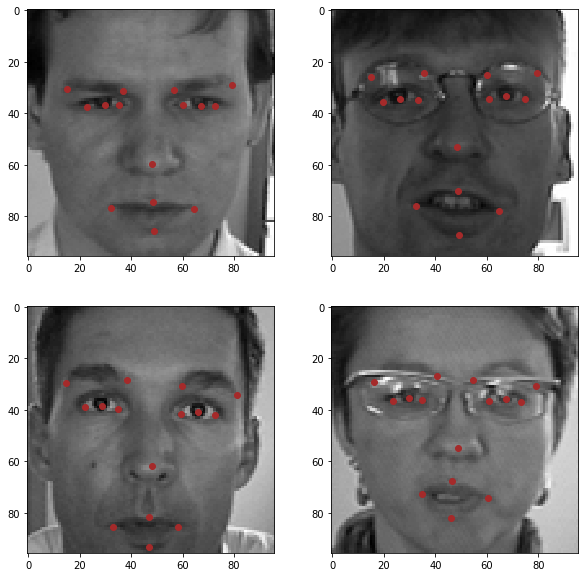

In [0]:

all_indices = facial_keypoints_df.index.values

notna_df = facial_keypoints_df.dropna()
notna_indices = notna_df.index.values
na_indices = np.array(list( set(all_indices.tolist()) - set(notna_indices.tolist()) ))

length_all = len(notna_indices)

shape = np.shape(images)
image_tensor = []

for i in range(shape[2]):
  image_tensor.append(images[:,:,i])

image_tensor = np.array(image_tensor)/255
#image_tensor = tf.convert_to_tensor(image_tensor)/255
keypoints = facial_keypoints_df.iloc[notna_indices].values
_images = image_tensor[notna_indices, ...]

test_images = image_tensor[na_indices, ...]

validation_images = test_images[: int(shape[2]/10), ...]



mean_keypoints = np.mean(keypoints, axis = 0)
mean_keypoints = tf.cast(tf.convert_to_tensor(mean_keypoints), tf.float32)



train_images, test_images, train_keypoints, test_keypoints = train_test_split(_images.tolist(), keypoints.tolist(), test_size = 0.1, shuffle = False)


train_images = tf.cast(tf.convert_to_tensor(train_images), tf.float32)[..., None]
test_images = tf.cast(tf.convert_to_tensor(test_images), tf.float32)[..., None]
train_keypoints = tf.cast(tf.convert_to_tensor(train_keypoints), tf.float32)[..., None]
test_keypoints = tf.cast(tf.convert_to_tensor(test_keypoints), tf.float32)[..., None]
validation_images = tf.cast(tf.convert_to_tensor(validation_images), tf.float32)[..., None]

length_train = np.shape(train_keypoints)[0]

rand_idx = np.random.randint(length_train)

plt.figure(figsize = (10,10))
for i in range(4):

  plt.subplot(2,2,1+i)
  plt.imshow(train_images[i + rand_idx, :, :, 0], cmap='gray')
  points = tf.Variable(keypoints[rand_idx+i, :])

  plt.scatter(x = points[0::2], y = points[1::2], c = "brown")

plt.show()
plt.close()

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_keypoints)).batch(BATCH_SIZE)
train_dist_dataset = tpu_strategy.experimental_distribute_dataset(train_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_keypoints)).batch(BATCH_SIZE)
test_dist_dataset = tpu_strategy.experimental_distribute_dataset(train_dataset)






In [0]:
start = time.localtime(time.time())

losses = deque(maxlen = 50)
losses_plot = []

with tpu_strategy.scope():
  # Set reduction to `none` so we can do the reduction afterwards and divide by
  # global batch size.
  loss_object = tf.keras.losses.MeanSquaredError(
      reduction=tf.keras.losses.Reduction.NONE)
  # or loss_fn = tf.keras.losses.sparse_categorical_crossentropy
  def compute_loss(labels, predictions):
    per_example_loss = loss_object(labels, predictions)
    return tf.nn.compute_average_loss(per_example_loss, global_batch_size=BATCH_SIZE)

  def train_step1(inputs, mean_keypoints):
    images, labels = inputs

    with tf.GradientTape() as tape:
      predictions = model(images, train = True) + mean_keypoints
      loss = compute_loss(labels, predictions)
    
      gradients = tape.gradient(loss, model.trainable_variables)
    optimizer1.apply_gradients(zip(gradients, model.trainable_variables))

    return loss 

  def train_step2(inputs, mean_keypoints):
    images, labels = inputs

    with tf.GradientTape() as tape:
      predictions = model(images, train=True) + mean_keypoints
      loss = compute_loss(labels, predictions)
    
      gradients = tape.gradient(loss, model.trainable_variables)
    optimizer2.apply_gradients(zip(gradients, model.trainable_variables))

    return loss   

  def test_step(inputs, mean_keypoints):
    images, labels = inputs

    predictions = model(images, train = False) + mean_keypoints
    loss = compute_loss(labels, predictions)

    return loss   

  model = BCNN(input_shape, num_classes, n_filters, n_fc1, n_fc2)
  optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.0001)
  optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.0001)

  @tf.function
  def distributed_train_step1(dataset_inputs, mean_keypoints):
    per_replica_losses = tpu_strategy.experimental_run_v2(train_step1,
                                                      args=(dataset_inputs, mean_keypoints, ))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)
  @tf.function
  def distributed_train_step2(dataset_inputs, mean_keypoints):
    per_replica_losses = tpu_strategy.experimental_run_v2(train_step2,
                                                      args=(dataset_inputs, mean_keypoints, ))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)  
    
  @tf.function
  def distributed_test_step(dataset_inputs, mean_keypoints):
    per_replica_losses = tpu_strategy.experimental_run_v2(test_step,
                                                      args=(dataset_inputs, mean_keypoints, ))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)  
 
  step_test =0
  step = 0
  rand_idx = np.random.randint(10)


  test_losses = []

  for epoch in range(n_epochs):
    
    # TRAIN LOOP
    num_batches = 0
    if epoch > 0:
      print(epoch)

    for x in train_dist_dataset:
      step+=1
      if epoch > 350: 
        loss = distributed_train_step2(x, mean_keypoints)
      else:  
        loss = distributed_train_step1(x, mean_keypoints)
      num_batches += 1
      #if epoch == 1:
      #  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1 = 0.85)

    for x_test in test_dist_dataset:
      step_test += 1
      loss = distributed_test_step(x_test, mean_keypoints)
      if step_test == rand_idx:
        check_image = x_test[0].values
        if epoch > 10:
          test_losses.append(loss)
  print("all is working")
       

  plt.plot(test_losses)
  plt.show()
  plt.close()

with tf.device("cpu:0"):
  for j in range(8):
    check_image_ = validation_images[j*100: j*100 +200]
    output = (model(check_image_, train = False)) + mean_keypoints
    for i in range(4):
      image_ = check_image_[i,:,:,0]
      keypoints_ = output[i]

      plt.imshow(image_, cmap = "gray")
      plt.scatter(x = keypoints_[0::2], y = keypoints_[1::2])
      plt.show()




end = time.localtime(time.time())
start_in_sec = start[3]*3600 + start[4]*60 + start[5]
end_in_sec = end[3]*3600 + end[4]*60 + end[5]


all_time_min = int((end_in_sec-start_in_sec)/60)
all_time_sec = (end_in_sec-start_in_sec)%60
if all_time_min < 10:
	if all_time_sec < 10:
		print('0%s:0%s' % (all_time_min, all_time_sec ))
	else:
		print('0%s:%s' % (all_time_min, all_time_sec ))	
else:
	if all_time_sec < 10:
		print('%s:0%s' % (all_time_min, all_time_sec ))
	else:
		print('%s:%s' % (all_time_min, all_time_sec ))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


KeyboardInterrupt: ignored